# Importing Libraries

In [82]:
import cv2

import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# Plotting Image

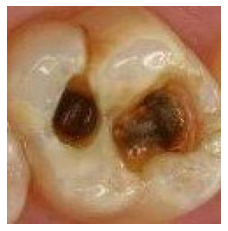

In [83]:
orig_img = cv2.imread("/kaggle/input/teeth/wc31.jpg",1) # 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format

plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Checking the shape of the image:

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread("/kaggle/input/teeth/wc31.jpg")
print(image.shape) 
 
print(image)

(124, 122, 3)
[[[167 100  83]
  [172 105  88]
  [175 108  91]
  ...
  [172  95  85]
  [170  94  81]
  [171  95  82]]

 [[167 100  84]
  [170 103  87]
  [172 105  89]
  ...
  [172  95  85]
  [175  99  86]
  [177 101  88]]

 [[168  98  86]
  [170 100  88]
  [171 101  89]
  ...
  [176  99  91]
  [172  95  87]
  [173  96  88]]

 ...

 [[181 146 118]
  [180 143 116]
  [176 136 111]
  ...
  [166  92  83]
  [164  90  81]
  [164  90  81]]

 [[185 148 121]
  [178 138 112]
  [169 124 101]
  ...
  [164  90  81]
  [162  88  79]
  [162  88  79]]

 [[171 129 104]
  [178 134 109]
  [175 129 106]
  ...
  [158  85  76]
  [161  87  78]
  [161  87  78]]]


# Converting the Image into Greyscale

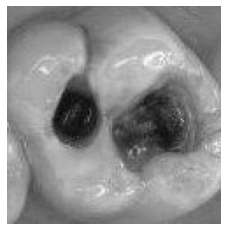

In [85]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()


# Performing Otsu's Binarization
This means that if the value of the pixel exceeds the threshold, it would be considered as 1.
Else, 0

Threshold limit: 125.0


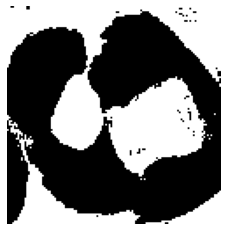

In [86]:
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

# Specifying the Background and Foreground after Noise Removal

In [87]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


# Performing Distance Transfrom
In distance transfrom, the gray level intensities of the points inside the foreground are changed to distance their respective distances from the closest 0 value

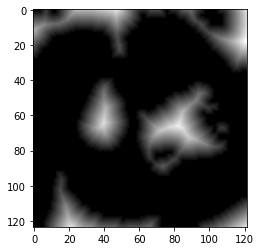

In [88]:
plt.imshow(dist_transform, cmap = 'gray')

# Plotting the Foreground, Background and the Subtracted Image

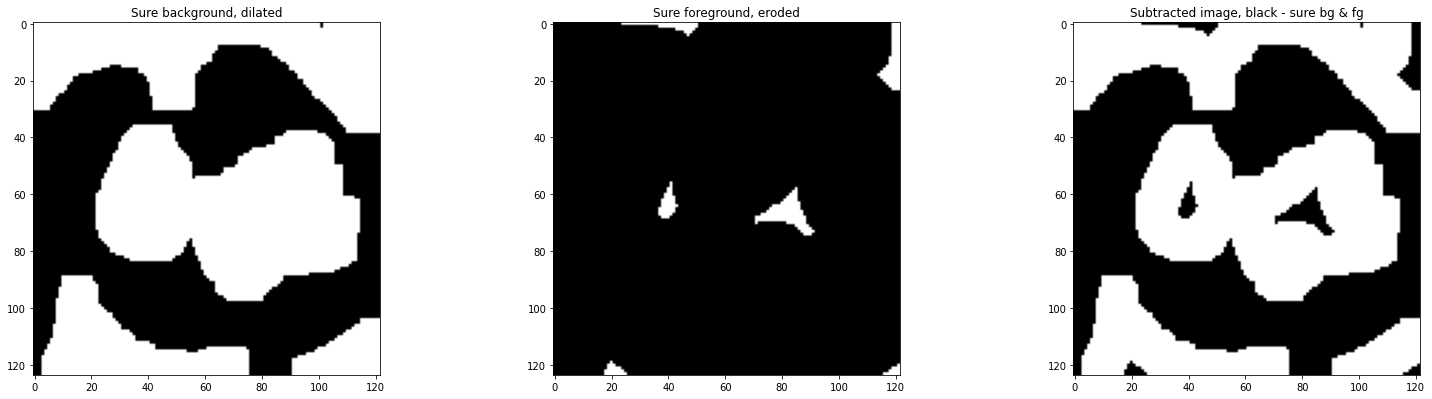

In [89]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

plt.subplots_adjust(wspace = 0.5)
# fine tuning 



* The background is denoted by black
* The second image is distance transformed and thresholded
* The white area is the unknown area

# Displaying the connected components sure_bg and sure_fg

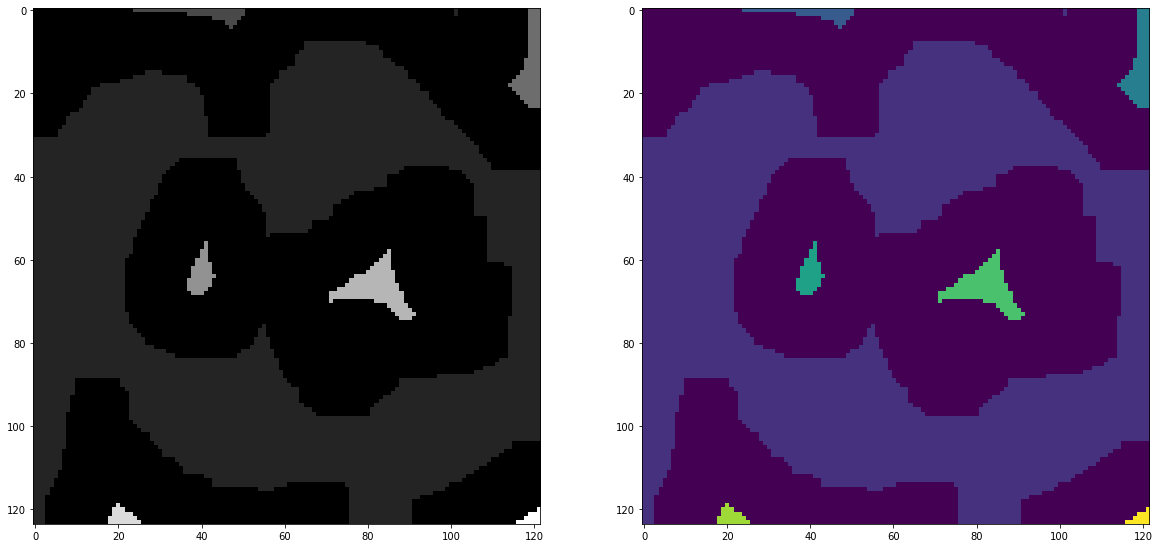

In [90]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

# Applying Watershed Segmentation

In [91]:
markers = cv2.watershed(orig_img, markers)
orig_img[markers == -1] = [0, 255,0]

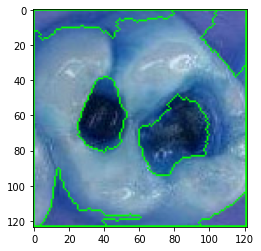

In [92]:
plt.imshow(orig_img)

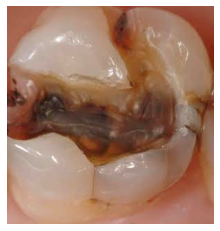

In [93]:
orig_img2 = cv2.imread("/kaggle/input/Teeth2/wc45.jpg",1) # 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format

plt.imshow(cv2.cvtColor(orig_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Denoising the Image

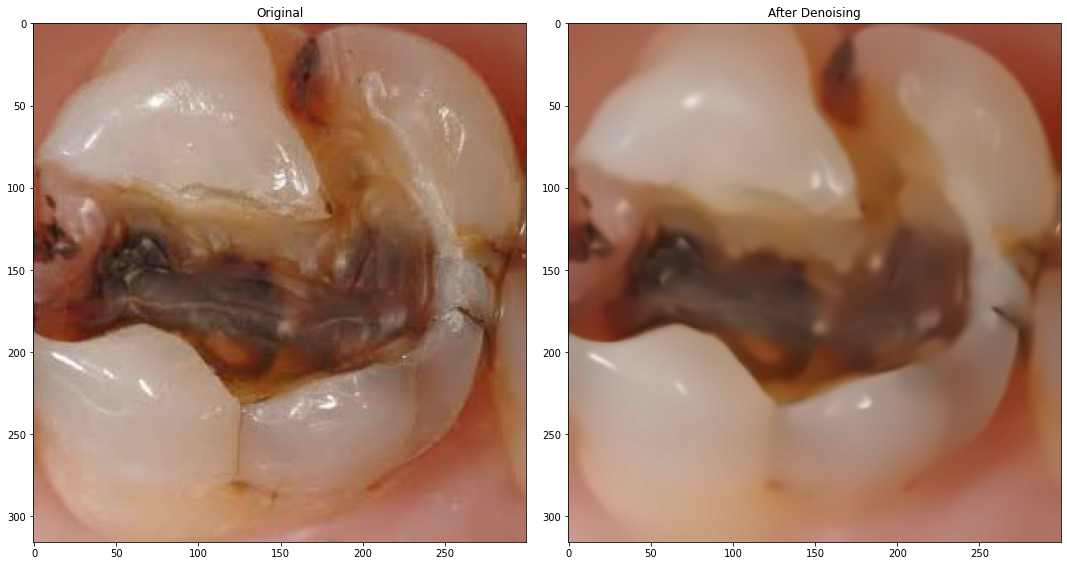

In [94]:
dst = cv2.fastNlMeansDenoisingColored(orig_img2, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(orig_img2, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('After Denoising')
plt.show()

In [95]:
pip install oct2py

Note: you may need to restart the kernel to use updated packages.


# 

# Bit Plane Slicing

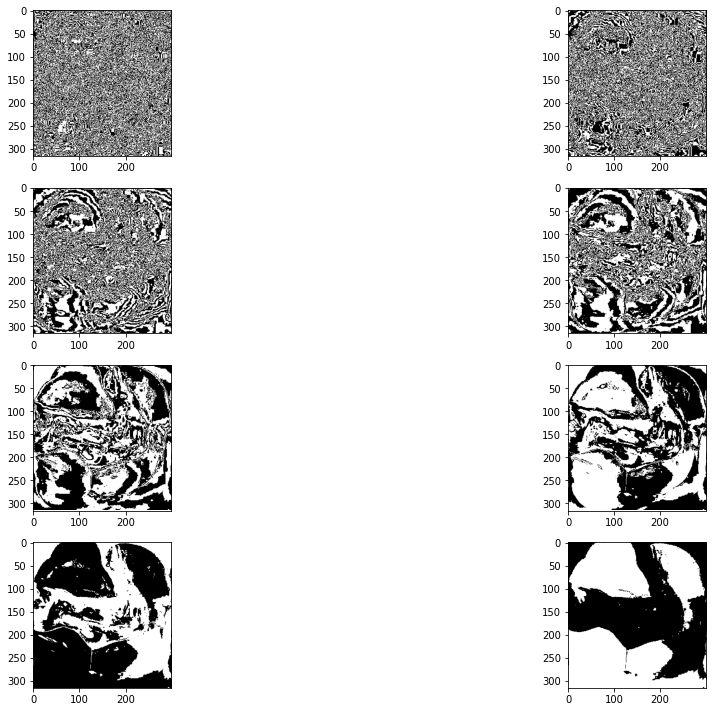

In [96]:
gray_img = cv2.cvtColor( orig_img2, cv2.COLOR_BGR2GRAY ) 
 
row, col = 4, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()

bit1 = np.bitwise_and(gray_img, 1)
bit2 = np.bitwise_and(gray_img, 2)
bit3 = np.bitwise_and(gray_img, 4)
bit4 = np.bitwise_and(gray_img, 8)
bit5 = np.bitwise_and(gray_img, 16)
bit6 = np.bitwise_and(gray_img, 32)
bit7 = np.bitwise_and(gray_img, 64)
bit8 = np.bitwise_and(gray_img, 128)
axs[0][0].imshow(bit1.astype(np.uint8)*255,cmap='gray')
axs[0][1].imshow(bit2.astype(np.uint8)*255,cmap='gray')
axs[1][0].imshow(bit3.astype(np.uint8)*255,cmap='gray')
axs[1][1].imshow(bit4.astype(np.uint8)*255,cmap='gray')
axs[2][0].imshow(bit5.astype(np.uint8)*255,cmap='gray')
axs[2][1].imshow(bit6.astype(np.uint8)*255,cmap='gray')
axs[3][0].imshow(bit7.astype(np.uint8)*255,cmap='gray')
axs[3][1].imshow(bit8.astype(np.uint8)*255,cmap='gray')
plt.show()

# Image Sampling

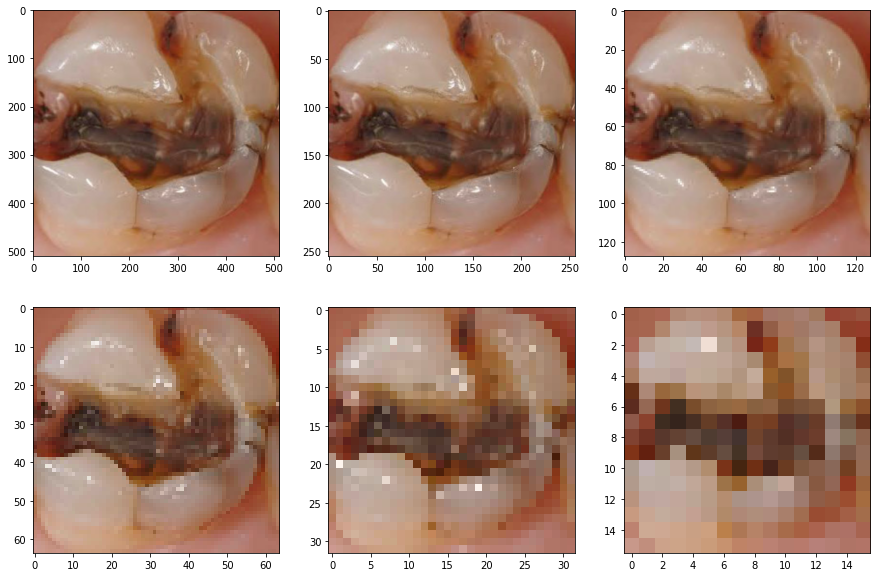

In [97]:
im = cv2.imread("/kaggle/input/Teeth2/wc45.jpg",1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im1 = cv2.resize(im, (512, 512))
im2 = cv2.resize(im, (256, 256))
im3 = cv2.resize(im, (128, 128))
im4 = cv2.resize(im, (64, 64))
im5 = cv2.resize(im, (32, 32))
im6 = cv2.resize(im, (16, 16))

plt.subplots(2, 3, figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(im1, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(im2, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(im3, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(im4, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(im5, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(im6, cmap='gray')
plt.show()

# Contrast Stretching using Histogram

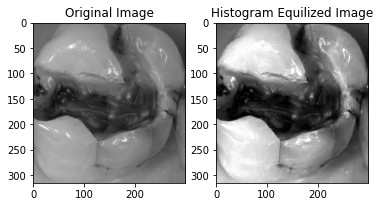

In [98]:
inp = cv2.imread("/kaggle/input/Teeth2/wc45.jpg")
inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
inpeq = cv2.equalizeHist(inp)

plt.subplot(1, 2, 1)
plt.imshow(inp, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(inpeq, cmap='gray')
plt.title('Histogram Equilized Image')
plt.show()

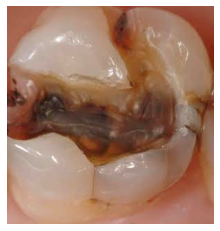

In [99]:
orig_img3 = cv2.imread("/kaggle/input/teeth3/620.jpg",1) # 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format

plt.imshow(cv2.cvtColor(orig_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Image Quantization

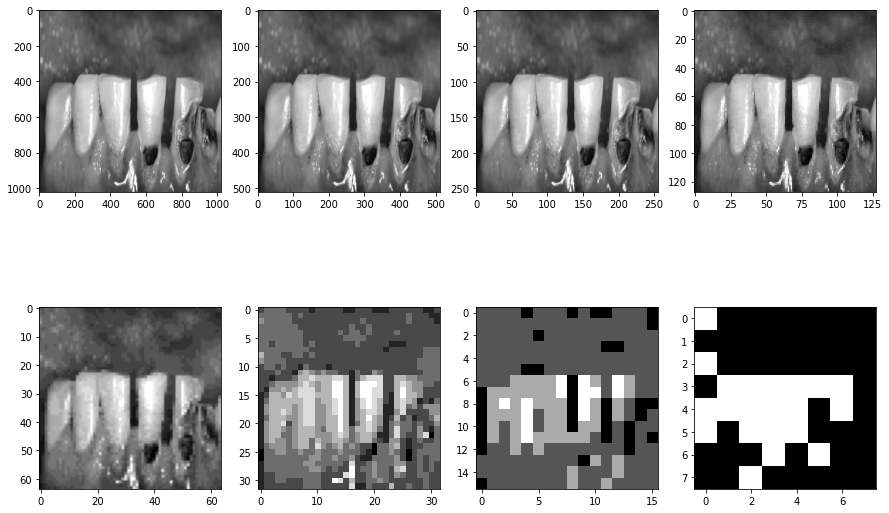

In [100]:
im = cv2.cvtColor(orig_img3, cv2.COLOR_BGR2GRAY)
im1 = cv2.resize(im, (1024, 1024))
im2 = cv2.normalize(cv2.resize(im1, (512, 512)), None, 0, 127, cv2.NORM_MINMAX, cv2.CV_8U)
im3 = cv2.normalize(cv2.resize(im1, (256, 256)), None, 0, 63, cv2.NORM_MINMAX, cv2.CV_8U)
im4 = cv2.normalize(cv2.resize(im1, (128, 128)), None, 0, 31, cv2.NORM_MINMAX, cv2.CV_8U)
im5 = cv2.normalize(cv2.resize(im1, (64, 64)), None, 0, 15, cv2.NORM_MINMAX, cv2.CV_8U)
im6 = cv2.normalize(cv2.resize(im1, (32, 32)), None, 0, 7, cv2.NORM_MINMAX, cv2.CV_8U)
im7 = cv2.normalize(cv2.resize(im1, (16, 16)), None, 0, 3, cv2.NORM_MINMAX, cv2.CV_8U)
im8 = cv2.normalize(cv2.resize(im1, (8, 8)), None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)

plt.subplots(2, 4, figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(im1, cmap='gray')
plt.subplot(2, 4, 2)
plt.imshow(im2, cmap='gray')
plt.subplot(2, 4, 3)
plt.imshow(im3, cmap='gray')
plt.subplot(2, 4, 4)
plt.imshow(im4, cmap='gray')
plt.subplot(2, 4, 5)
plt.imshow(im5, cmap='gray')
plt.subplot(2, 4, 6)
plt.imshow(im6, cmap='gray')
plt.subplot(2, 4, 7)
plt.imshow(im7, cmap='gray')
plt.subplot(2, 4, 8)
plt.imshow(im8, cmap='gray')
plt.show()

# Image segmentation

## Otsu’s Image segmentation (Threshold-based segmentation)

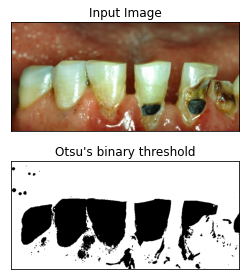

In [101]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/kaggle/input/teeth3/620.jpg")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# Edge-based image segmentation algorithms

## Code implementation for Robert operator:

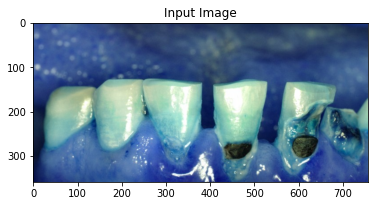

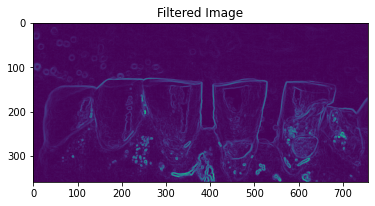

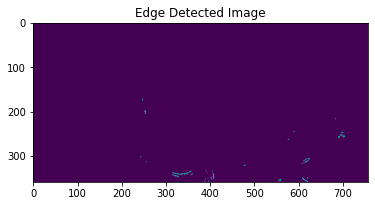

In [102]:
# Read Input Image
input_image = cv2.imread("/kaggle/input/teeth3/620.jpg")
# Displaying Input Image
input_image = np.uint8(input_image)
plt.imshow(input_image)
plt.title('Input Image')
plt.show()

# Convert the truecolor RGB image to the grayscale image
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Convert the image to double
input_image = np.double(input_image)

# Pre-allocate the filtered_image matrix with zeros
filtered_image = np.zeros(input_image.shape)

# Robert Operator Mask
Mx = np.array([[1, 0], [0, -1]])
My = np.array([[0, 1], [-1, 0]])

# Edge Detection Process
# When i = 1 and j = 1, then filtered_image pixel  
# position will be filtered_image[0, 0]
# The mask is of 2x2, so we need to traverse 
# to filtered_image[size(input_image, 0) - 2, size(input_image, 1) - 2]
for i in range(input_image.shape[0]-1):
    for j in range(input_image.shape[1]-1):
        # Gradient approximations
        Gx = np.sum(Mx * input_image[i:i+2, j:j+2])
        Gy = np.sum(My * input_image[i:i+2, j:j+2])
        # Calculate magnitude of vector
        filtered_image[i, j] = np.sqrt(Gx**2 + Gy**2)

# Displaying Filtered Image
filtered_image = np.uint8(filtered_image)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.show()

# Define a threshold value
thresholdValue = 100 # varies between [0 255]
output_image = np.maximum(filtered_image, thresholdValue)
output_image[output_image == np.round(thresholdValue)] = 0

# Displaying Output Image
output_image = np.uint8(output_image)
output_image = cv2.threshold(output_image, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(output_image)
plt.title('Edge Detected Image')
plt.show()

## Code implementation for Prewitt operator:

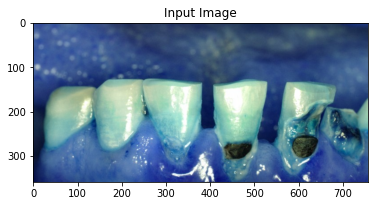

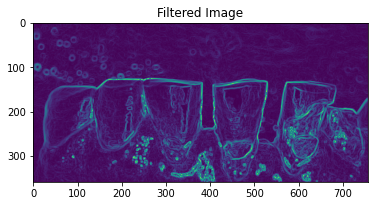

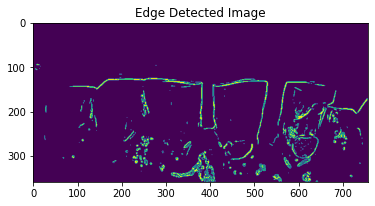

In [103]:
# Read Input Image
input_image = cv2.imread("/kaggle/input/teeth3/620.jpg")
# Displaying Input Image
input_image = np.uint8(input_image)
plt.imshow(input_image)
plt.title('Input Image')
plt.show()
# Convert the truecolor RGB image to the grayscale image
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
# Convert the image to double
input_image = np.float64(input_image)
# Pre-allocate the filtered_image matrix with zeros
filtered_image = np.zeros(input_image.shape)
# Prewitt Operator Mask
Mx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
My = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
# Edge Detection Process
# When i = 0 and j = 0, then filtered_image pixel
# position will be filtered_image[1, 1]
# The mask is of 3x3, so we need to traverse
# to filtered_image[size(input_image, 0) - 3,
# size(input_image, 1) - 3]
# Thus we are not considering the borders.
for i in range(input_image.shape[0] - 2):
    for j in range(input_image.shape[1] - 2):
        # Gradient approximations
        Gx = np.sum(np.multiply(Mx, input_image[i:i+3, j:j+3]))
        Gy = np.sum(np.multiply(My, input_image[i:i+3, j:j+3]))
        # Calculate magnitude of vector
        filtered_image[i+1, j+1] = np.sqrt(Gx**2 + Gy**2)
# Displaying Filtered Image
filtered_image = np.uint8(filtered_image)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.show()
# Define a threshold value
thresholdValue = 100  # varies between [0 255]
output_image = np.maximum(filtered_image, thresholdValue)
output_image[output_image == np.round(thresholdValue)] = 0
# Displaying Output Image
output_image = np.uint8(output_image)
output_image = cv2.threshold(output_image, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(output_image)
plt.title('Edge Detected Image')
plt.show()

## Code implementation for Sobel operator:

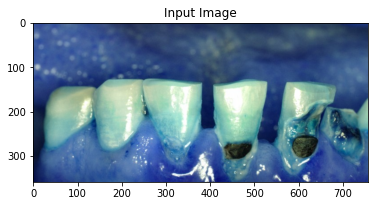

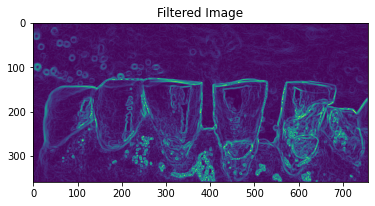

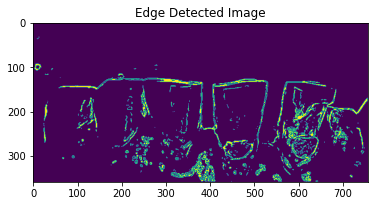

In [104]:
# Read Input Image
input_image = cv2.imread("/kaggle/input/teeth3/620.jpg")
# Displaying Input Image
input_image = np.uint8(input_image)
plt.imshow(input_image)
plt.title('Input Image')
plt.show()
# Convert the truecolor RGB image to the grayscale image
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
# Convert the image to double
input_image = np.float64(input_image)
# Pre-allocate the filtered_image matrix with zeros
filtered_image = np.zeros(input_image.shape)
# Sobel Operator Mask
Mx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
My = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# Edge Detection Process
# When i = 0 and j = 0, then filtered_image pixel
# position will be filtered_image[1, 1]
# The mask is of 3x3, so we need to traverse
# to filtered_image[size(input_image, 0) - 3,
# size(input_image, 1) - 3]
# Thus we are not considering the borders.
for i in range(input_image.shape[0] - 2):
    for j in range(input_image.shape[1] - 2):
        # Gradient approximations
        Gx = np.sum(np.multiply(Mx, input_image[i:i+3, j:j+3]))
        Gy = np.sum(np.multiply(My, input_image[i:i+3, j:j+3]))
        # Calculate magnitude of vector
        filtered_image[i+1, j+1] = np.sqrt(Gx**2 + Gy**2)
# Displaying Filtered Image
filtered_image = np.uint8(filtered_image)
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.show()
# Define a threshold value
thresholdValue = 100  # varies between [0 255]
output_image = np.maximum(filtered_image, thresholdValue)
output_image[output_image == np.round(thresholdValue)] = 0
# Displaying Output Image
output_image = np.uint8(output_image)
output_image = cv2.threshold(output_image, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(output_image)
plt.title('Edge Detected Image')
plt.show()

## Clustering-based image segmentation :

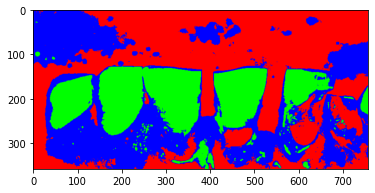

In [105]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load image and reshape to a 2D array
image = cv2.imread("/kaggle/input/teeth3/620.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_2d = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Apply K-means clustering to the reshaped image
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2d)

# Reshape the clustered image back to its original shape
clustered = kmeans.labels_.reshape(image.shape[0], image.shape[1])

# Visualize the segmented image
segmented_image = np.zeros_like(image)
for i in range(3):
    segmented_image[:, :, i] = np.where(clustered == i, 255, 0)

plt.imshow(segmented_image)